In [ ]:
#1
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import skew

In [ ]:
#2
# Supposons que le fichier s'appelle 'dataset.csv'
df = pd.read_csv('/content/50_AdAgency.csv')


In [ ]:
#3
print(df.head(10))
print(df.info())


   Print Media Expenses  Social Media Expenses  Outdoor Ad Expenses  \
0             165349.20              136897.80            471784.10   
1             162597.70              151377.59            443898.53   
2             153441.51              101145.55            407934.54   
3             144372.41              118671.85            383199.62   
4             142107.34               91391.77            366168.42   
5             131876.90               99814.71            362861.36   
6             134615.46              147198.87            127716.82   
7             130298.13              145530.06            323876.68   
8             120542.52              148718.95            311613.29   
9             123334.88              108679.17            304981.62   

         City     Profit  
0      Mumbai  192261.83  
1  Chandigarh  191792.06  
2       Delhi  191050.39  
3      Mumbai  182901.99  
4       Delhi  166187.94  
5      Mumbai  156991.12  
6  Chandigarh  156122.51  
7 

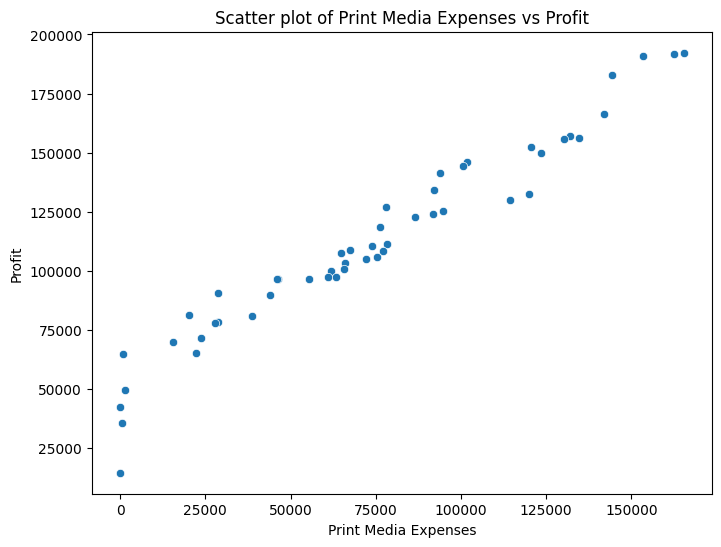

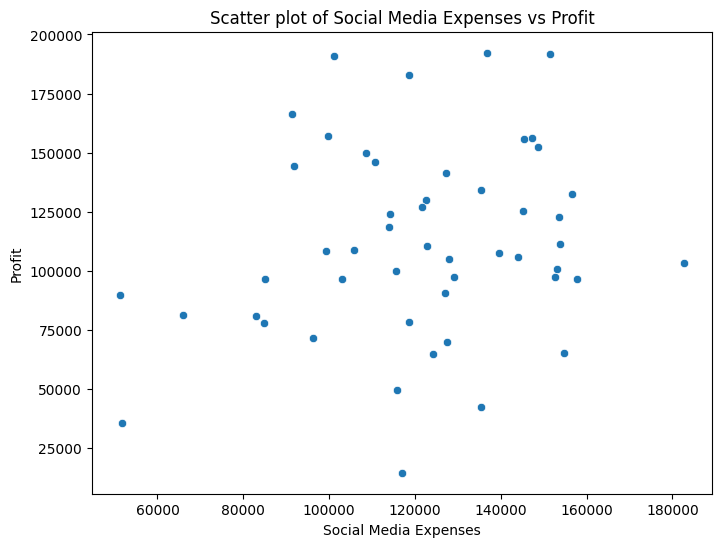

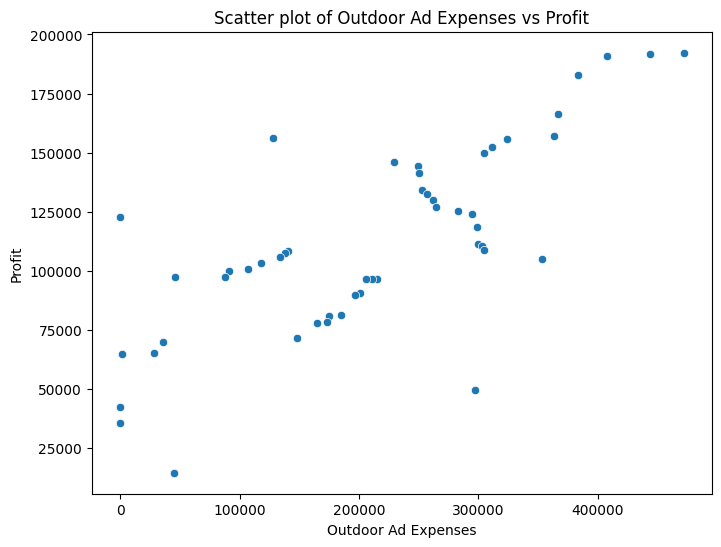

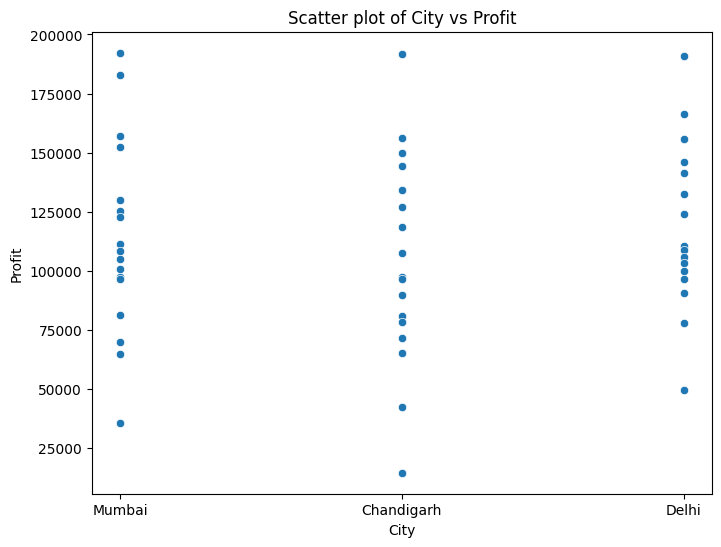

In [ ]:
#4
from matplotlib import pyplot as plt
# Variables de description
features = ['Print Media Expenses', 'Social Media Expenses', 'Outdoor Ad Expenses' ,'City']

# Variable de décision
target = 'Profit'

# Créer des scatter plots pour chaque variable de description par rapport à la variable de décision
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Scatter plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [11]:
#5
from sklearn.linear_model import LinearRegression


In [17]:
#6
# Assuming 'df' is your DataFrame
X = df[['Print Media Expenses', 'Social Media Expenses', 'Outdoor Ad Expenses']]
y = df['Profit']  # Select the actual data for the target variable

In [18]:
#7
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)


[ 0.80571505 -0.02681597  0.02722806]
50122.19298986524


<Axes: >

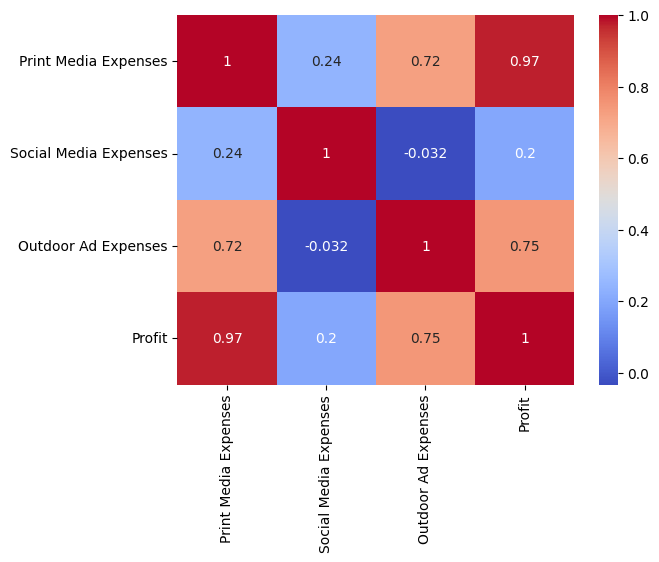

In [20]:
#8
# Drop non-numerical columns before calculating correlations
numerical_df = df.drop('City', axis=1)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

In [23]:
#9
X_selected = df[['Print Media Expenses', 'Social Media Expenses']]


from sklearn.metrics import r2_score

model.fit(X_selected, y)
y_pred = model.predict(X_selected)
print(r2_score(y, y_pred))

model.fit(X, y)
y_pred_full = model.predict(X)
print(r2_score(y, y_pred_full))



# Sélection d'autres attributs
X_alt = df[['Print Media Expenses', 'Outdoor Ad Expenses']]
model.fit(X_alt, y)
y_pred_alt = model.predict(X_alt)
print(r2_score(y, y_pred_alt))


0.9478129385009173
0.9507459940683246
0.9504503015559763


In [24]:
#10
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [25]:
#11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#12
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#13
y_pred_test = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 8995.905803361415
R²: 0.9000653083037321


In [28]:
#14
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [30]:
model.fit(X_train_sel, y_train_sel)
y_pred_test_sel = model.predict(X_test_sel)
rmse_sel = np.sqrt(mean_squared_error(y_test_sel, y_pred_test_sel))
r2_sel = r2_score(y_test_sel, y_pred_test_sel)
print(f'RMSE sans Outdoor Ad Expenses: {rmse_sel}')
print(f'R² sans Outdoor Ad Expenses: {r2_sel}')


RMSE sans Outdoor Ad Expenses: 9152.274782350905
R² sans Outdoor Ad Expenses: 0.8965609365509308
